<a href="https://colab.research.google.com/github/VISHNUCHARAN27/Module1/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: B. VISHNU CHARAN**


**REG NO: 17BCI0090**

In [25]:
import pandas as pd
df=pd.read_csv('/content/cars.csv')
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [26]:
df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [27]:
len(df)

261

In [28]:
df.isnull().values.any()

False

In [29]:
df.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [0]:
df.columns=['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand']

In [36]:
df.dtypes

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object

In [0]:
X=df.drop(['brand'],axis='columns')
#X=X.values
#X=pd.DataFrame(X)


In [71]:
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [82]:
X.dtypes

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
dtype: object

We convert the object datatypes to float

In [0]:
X=X.dropna()

In [0]:
k=[]
for i in X['cubicinches']:
  if i!='':
    k.append(float(i)) 
  else:
    k.append(0)

import math

meank=math.floor(sum(k)/len(k))

for i in range(0,len(k)):
  if k[i]==0:
    k[i]=meank
    

In [0]:
X['cubicinches']=k

In [0]:
k=[]
for i in X['weightlbs']:
  if i!='':
    k.append(float(i))
  else:
    k.append(0)

import math

meank=math.floor(sum(k)/len(k))

for i in range(0,len(k)):
  if k[i]==0:
    k[i]=meank

In [0]:
X['weightlbs']=k

In [103]:
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [52]:
y=df['brand']
y.head()

0         US.
1     Europe.
2         US.
3         US.
4         US.
Name: brand, dtype: object

ELBOW METHOD

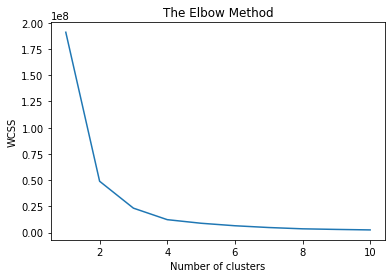

In [105]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
# We Apply k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


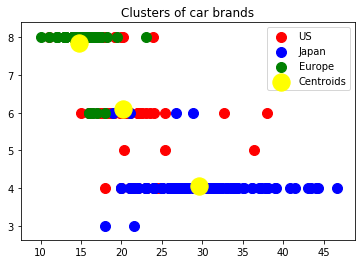

In [107]:
# We Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()